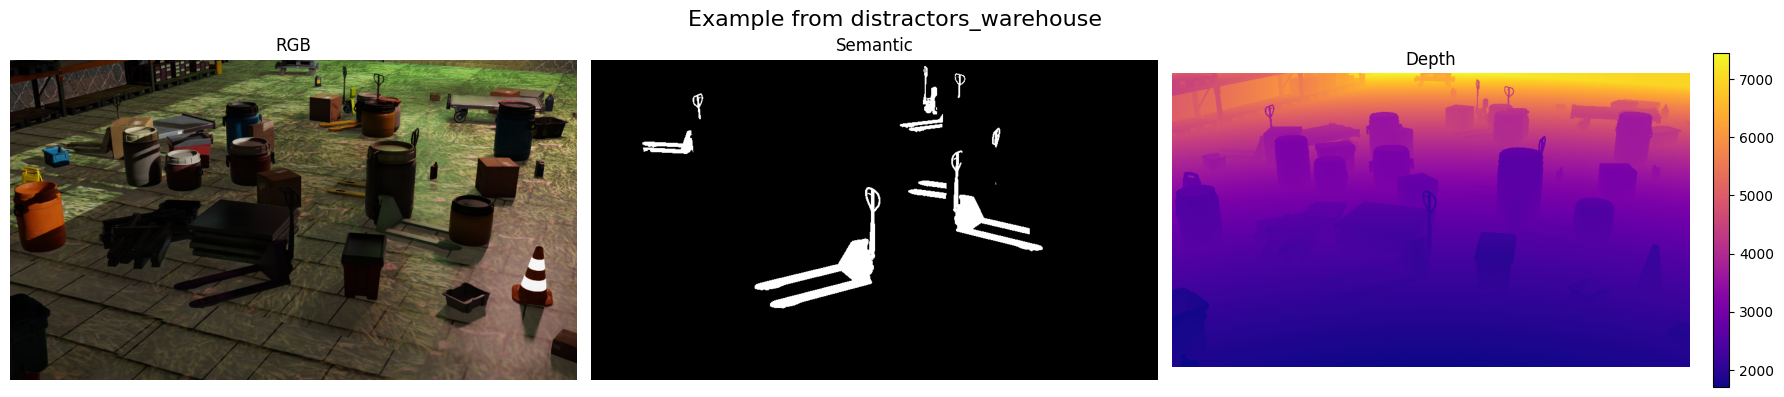

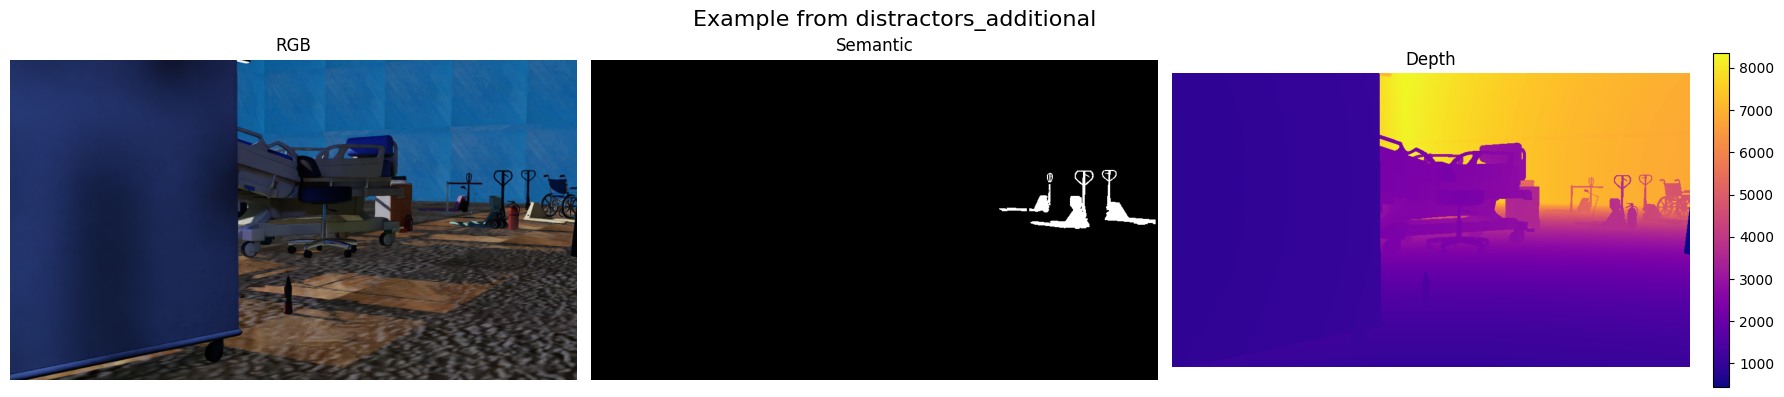

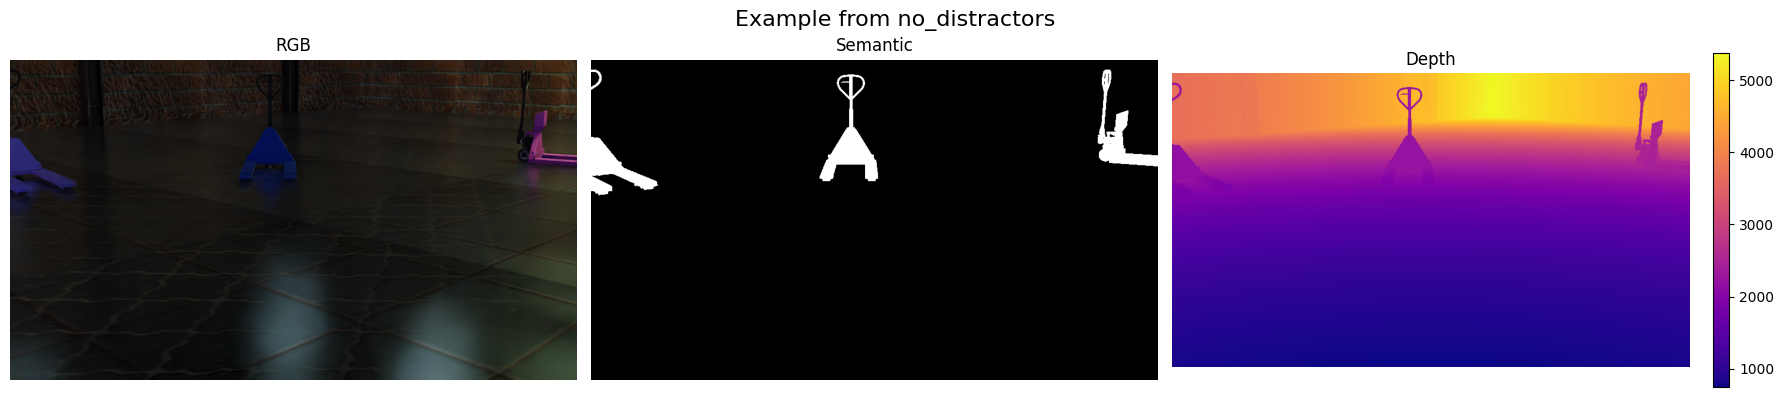

In [21]:
import cv2
import matplotlib.pyplot as plt

dataset_base = r"E:\synthetic_data_generation_training_workflow\palletjack_sdg\palletjack_data"
for variant in ["distractors_warehouse", "distractors_additional", "no_distractors"]:
    idx = 161  
    base = rf"{dataset_base}\{variant}\Camera"
    rgb = cv2.imread(rf"{base}\rgb\{idx}.png")
    sem = cv2.imread(rf"{base}\semantic_segmentation\{idx}.png", cv2.IMREAD_GRAYSCALE)
    depth = cv2.imread(rf"{base}\depth\{idx}.png", cv2.IMREAD_UNCHANGED)

    plt.figure(figsize=(18,4))
    plt.subplot(1,3,1); plt.title('RGB'); plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.subplot(1,3,2); plt.title('Semantic'); plt.imshow(sem, cmap='gray'); plt.axis('off')
    plt.subplot(1,3,3); plt.title('Depth'); plt.imshow(depth, cmap='plasma'); plt.axis('off'); plt.colorbar(fraction=0.046, pad=0.04)
    plt.suptitle(f"Example from {variant}", fontsize=16)
    plt.tight_layout(); plt.show()


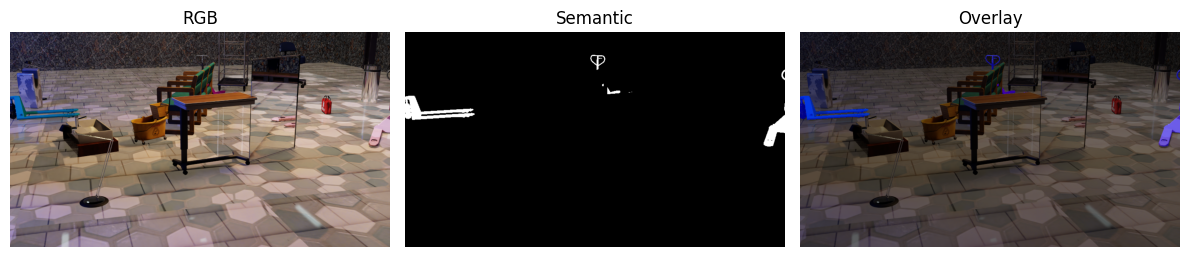

In [22]:
import numpy as np

idx = 0
base = r"E:\synthetic_data_generation_training_workflow\palletjack_sdg\palletjack_data\distractors_additional\Camera"

rgb_path = rf"{base}\rgb\{idx}.png"
sem_path = rf"{base}\semantic_segmentation\{idx}.png"

rgb = cv2.imread(rgb_path)
sem = cv2.imread(sem_path, cv2.IMREAD_GRAYSCALE)

# Check shapes
assert rgb is not None and sem is not None, "Images failed to load!"
assert rgb.shape[:2] == sem.shape, f"Shape mismatch: {rgb.shape[:2]} vs {sem.shape}"

palette = {
    0: (0, 0, 0),         # background (black)
    194: (255, 0, 0)      # class 194 (red)
}


sem_color = np.zeros_like(rgb)
for class_id, color in palette.items():
    sem_color[(sem == class_id)] = color

alpha = 0.5
overlay = cv2.addWeighted(rgb, 1 - alpha, sem_color, alpha, 0)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('RGB')
plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Semantic')
plt.imshow(sem, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Overlay')
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()
